In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.3f}".format

In [2]:
data = pd.read_csv(r'PUBG\train_V2.csv')
data.shape

(4446966, 29)

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.004,0,11.040,0,0,1434.000,5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [4]:
# mean dmg dealt ppl with kills and without kills
# number of headshot per kill
# kill strikes
# assists

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


* __groupId__ - identify of group in a match.
* __matchId__ - identify match. 
* __assists__ - Enemies that player damaged which were killed by other player form team.
* __boosts__ - boost items used
* __damageDealt__ 
* __DBNOs__ - knocked enemies.
* __headshotKills__ - Enemies killed by HS
* __heals__ - Healing items used.
* __killPlace__ - Ranki in match by enemies killed.
* __killPoints__ - Rank by kills
* __kills__ - Enemies killed
* __killStreaks__ - Enemies killed in shor time.
* __longestKill__ 
* __maxPlace__ - Worst placement 
* __numGroups__ - Number of groups we have data for in the match.
* __revives__ - Number of times this player revived teammates.
* __rideDistance__ - Distance traveled in vehicles meters.
* __roadKills__ - Kills while in a vehicle.
* __swimDistance__ - Distance swimmed meters
* __teamKills__ - Teammate killed times
* __vehicleDestroys__ - Destroyed vehicles. 
* __walkDistance__ - Distance walked meters
* __weaponsAcquired__ - Weapons 
* __winPoints__ - Rank based on wins
* __winPlacePerc__ - The target of prediction. 

In [6]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
print(f'Average number of kills by player in single match is: ',round(data['kills'].mean(),2))
print('Max kills in single match is: ',data['kills'].max())

Average number of kills by player in single match is:  0.92
Max kills in single match is:  72


## Kills Analysis 

In [8]:
def kills_grouped(x):
    if x == 0:
        return '0 kills'
    elif x >= 1 and x <=3:
        return '1-3 kills'
    elif x >= 4 and x <=5:
        return '4-5 kills'
    elif x >= 6 and x <=9:
        return '6-9 kills'
    elif x >= 10 and x <=20:
        return '10-20 kills'
    elif x >= 20 and x <=50:
        return '20-50 kills'
    else:
        return '+50 kills'

    
def typee(x):
    if ('solo' in x):
        return 'solo'
    elif ('duo' in x):
        return 'duo'
    else:
        return 'squad'

In [9]:
data['kills_grouped'] = data['kills'].apply(lambda x: kills_grouped(x))
data['mtype'] = data['matchType'].apply(lambda x: typee(x))

In [10]:
dfk = pd.concat([data.groupby('kills_grouped')['Id'].count().sort_values(ascending=False),data.groupby('kills_grouped')['Id'].count().sort_values(ascending=False)/data.shape[0]],axis=1).reset_index()
dfk.columns = ['kills_grouped','count', 'percent']

In [11]:
dfk

,kills_grouped,count,percent
0,0 kills,2529722,0.569
1,1-3 kills,1632986,0.367
2,4-5 kills,191120,0.043
3,6-9 kills,80199,0.018
4,10-20 kills,12476,0.003
5,20-50 kills,450,0.000
6,+50 kills,13,0.000


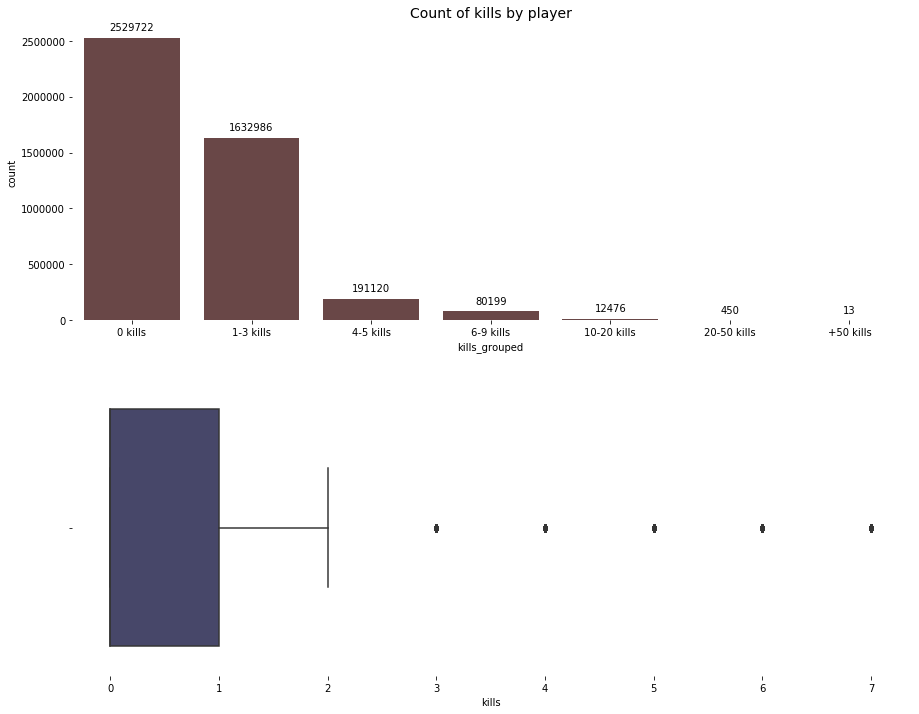

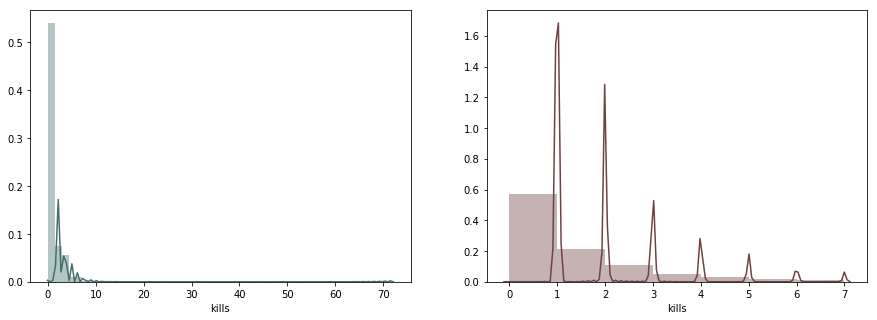

In [12]:
f,ax = plt.subplots(2,1,figsize=(15,12))
a1 = sns.countplot(data['kills_grouped'],palette=['#6F4141'],ax=ax[0])
a1.set_title('Count of kills by player',fontsize=14);
sns.despine(bottom=True, left=True)
for p in a1.patches:
    a1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
a2 = sns.boxplot(data[data['kills']<=data['kills'].quantile(0.99)]['kills'], palette=['#41416f'],ax=ax[1])

f,ax = plt.subplots(1,2,figsize=(15,5))
a3 = sns.distplot(data['kills'],ax=ax[0],color='#416f6f');
a4 = sns.distplot(data[data['kills']<=data['kills'].quantile(0.99)]['kills'],ax=ax[1],color='#6F4141',bins=7);

In [13]:
pd.DataFrame(data['kills'].describe()).T

,count,mean,std,min,25%,50%,75%,max
kills,4446966.000,0.925,1.558,0.000,0.000,0.000,1.000,72.000


In [14]:
data['kills'].quantile(0.95)

4.0

* In all dataset players made almost 4,5 KK kills.
* Almost 57% of players in single match didn't make any kill
* 75% of players made 0 or 1 kills 
* 95% made <= 4 kills
* We can say that more then 10 kills is outlier :) There is like 15k of more then 10 kills

In [15]:
pd.DataFrame(data.corr()['kills'].sort_values(ascending=False)).T

,kills,damageDealt,killStreaks,DBNOs,headshotKills,longestKill,boosts,winPlacePerc,walkDistance,weaponsAcquired,...,roadKills,swimDistance,killPoints,teamKills,rankPoints,winPoints,numGroups,maxPlace,matchDuration,killPlace
kills,1.000,0.889,0.803,0.708,0.674,0.603,0.502,0.420,0.375,0.336,...,0.064,0.039,0.036,0.018,0.008,0.007,-0.004,-0.005,-0.031,-0.730


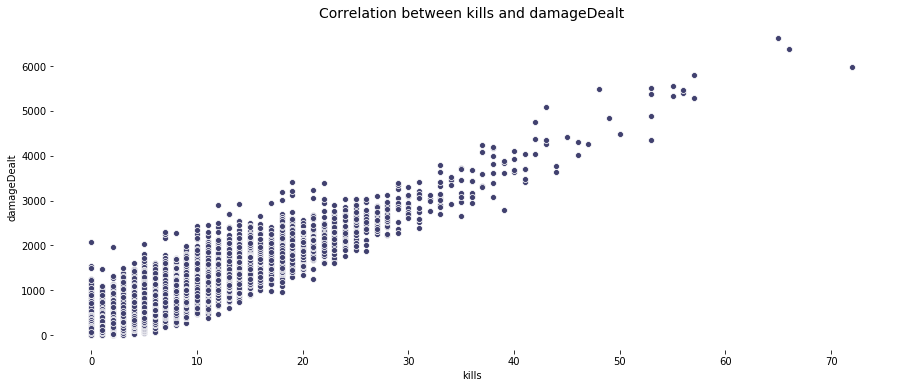

In [16]:
f,ax = plt.subplots(figsize=(15,6))
a5=sns.scatterplot(x=data['kills'],y=data['damageDealt']
                ,color='#41416f')
a5.set_title('Correlation between kills and damageDealt',fontsize=14);
sns.despine(bottom=True, left=True)

In [17]:
kills_0, kills_m = data[data['kills']==0], data[data['kills']>=1]

In [18]:
data.groupby('kills_grouped')['damageDealt'].mean().sort_values(ascending=False).reset_index()

,kills_grouped,damageDealt
0,+50 kills,5535.769
1,20-50 kills,2568.529
2,10-20 kills,1199.095
3,6-9 kills,711.481
4,4-5 kills,463.882
5,1-3 kills,193.808
6,0 kills,40.678


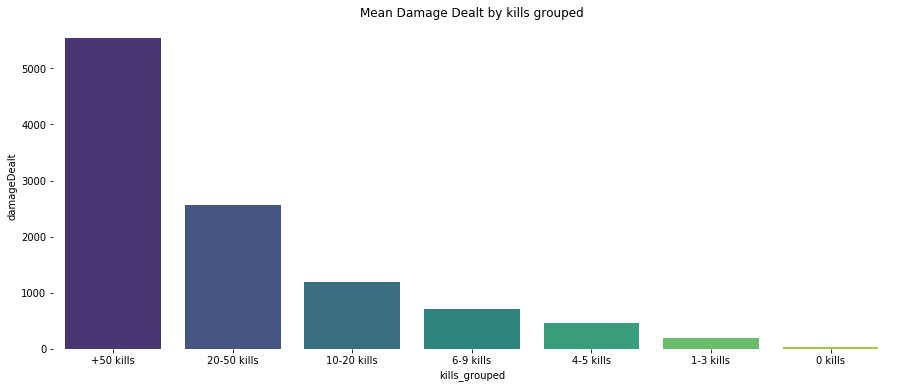

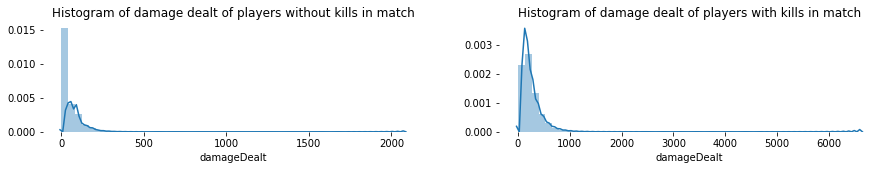

In [19]:
f,ax = plt.subplots(figsize=(15,6))
b1 = sns.barplot(x='kills_grouped',y='damageDealt',
                 data=data.groupby('kills_grouped')['damageDealt'].mean().sort_values(ascending=False).reset_index(),palette='viridis')
sns.despine(bottom=True, left=True)
f,ax = plt.subplots(1,2,figsize=(15,2))
b2 = sns.distplot(kills_0['damageDealt'],bins=50,ax=ax[0])
b2.set_title('Histogram of damage dealt of players without kills in match');
b3 = sns.distplot(kills_m['damageDealt'],bins=50,ax=ax[1]);
b3.set_title('Histogram of damage dealt of players with kills in match');
b1.set_title('Mean Damage Dealt by kills grouped');
sns.despine(bottom=True, left=True)

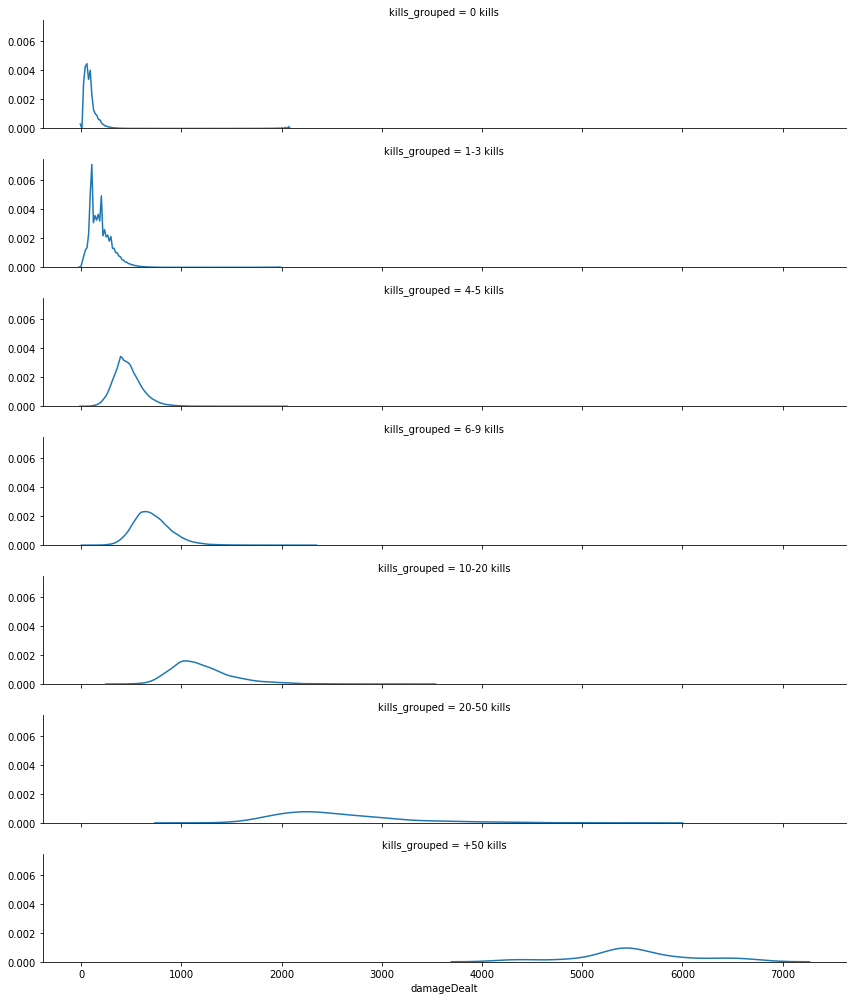

In [20]:
g = sns.FacetGrid(data, row="kills_grouped",
                  height=2, aspect=6)
g.map(sns.kdeplot, "damageDealt");

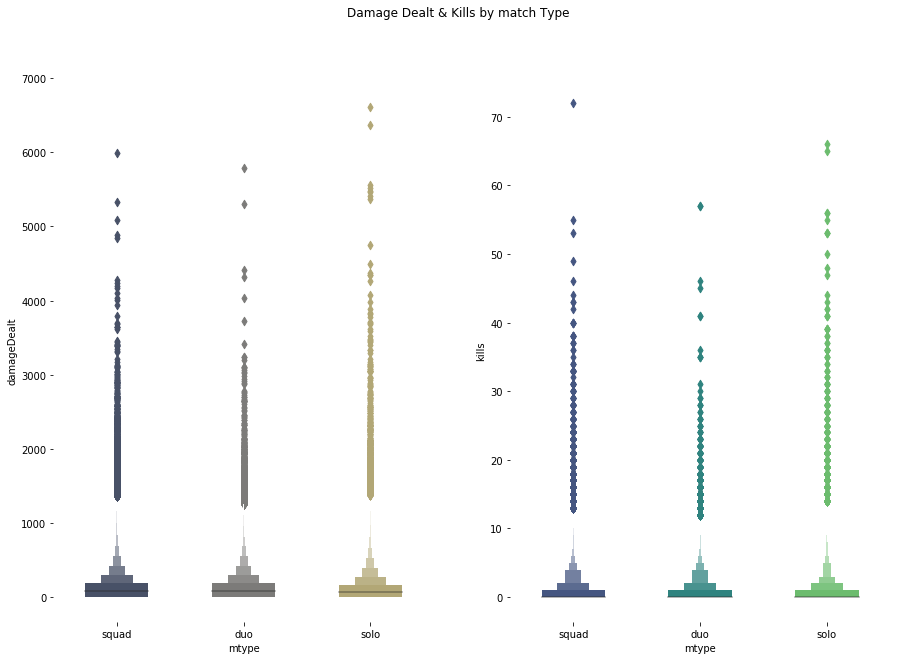

In [26]:
f,ax = plt.subplots(1,2,figsize=(15,10))
sns.boxenplot(x='mtype',y='damageDealt',data=data,ax=ax[0],palette='cividis',width=0.5)
sns.boxenplot(x='mtype',y='kills',data=data,ax=ax[1],palette='viridis',width=0.5)
plt.suptitle('Damage Dealt & Kills by match Type');
sns.despine(bottom=True, left=True)

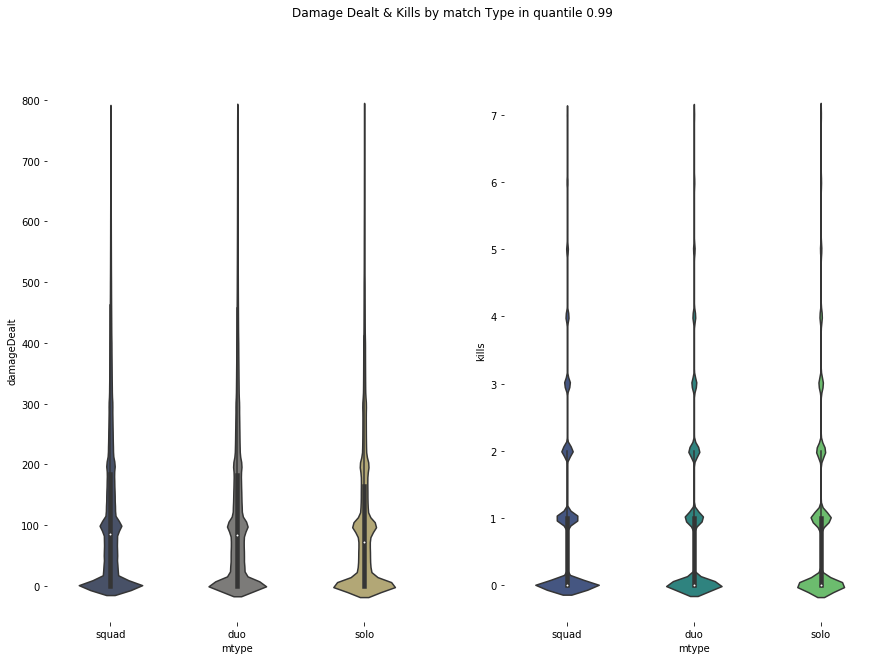

In [30]:
f,ax = plt.subplots(1,2,figsize=(15,6))
sns.violinplot(x='mtype',y='damageDealt',data=data[data['damageDealt']<=data['damageDealt'].quantile(0.99)],ax=ax[0],palette='cividis',width=0.5)
sns.violinplot(x='mtype',y='kills',data=data[data['kills']<=data['kills'].quantile(0.99)],ax=ax[1],palette='viridis',width=0.5)
plt.suptitle('Damage Dealt & Kills by match Type in quantile 0.99');
sns.despine(bottom=True, left=True)